<a href="https://colab.research.google.com/github/MuraliSrinivasTech/PRODIGY_TASKS_ML/blob/main/ML_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files


In [ ]:
uploaded = files.upload()
dataset_filename = list(uploaded.keys())[0]
data = pd.read_csv(dataset_filename)
print(data.head())
print(data.columns)
print(data.isnull().sum())


Saving ML.1 House.csv to ML.1 House.csv
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCond

In [ ]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
for column in data.select_dtypes(include=['number']).columns:
    data[column] = data[column].fillna(data[column].mean())
for column in non_numeric_columns:
    data[column] = data[column].fillna(data[column].mode()[0])
X = data[['TotalBsmtSF', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
30/30 [==============================] - 2s 34ms/step - loss: 39147085824.0000 - val_loss: 37842276352.0000
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 39147077632.0000 - val_loss: 37842255872.0000
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 39147065344.0000 - val_loss: 37842247680.0000
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 39147044864.0000 - val_loss: 37842235392.0000
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 39147032576.0000 - val_loss: 37842214912.0000
Epoch 6/100
30/30 [==============================] - 1s 22ms/step - loss: 39147020288.0000 - val_loss: 37842206720.0000
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 39147003904.0000 - val_loss: 37842190336.0000
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 39146987520.0000 - val_loss: 37842173952.0000
Epoch 9/100
30/30 [========================

10/10 [==============================] - 0s 5ms/step - loss: 39652683776.0000
Test Loss: 39652683776.0
10/10 [==============================] - 0s 4ms/step


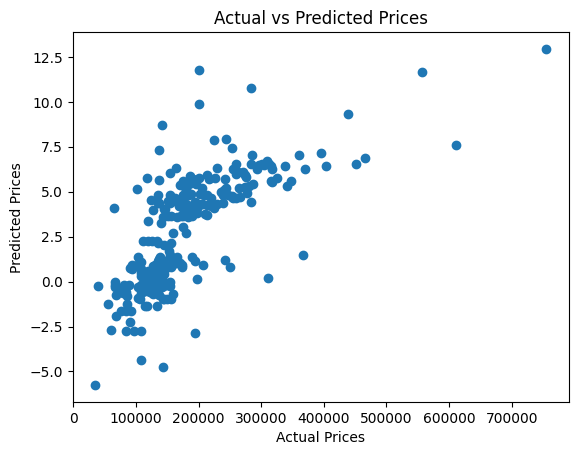

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()